In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [57]:
df = pd.read_csv(r'C:\Users\GabrielMedina\Desktop\Gitizin\carrinho_abandonado_csv.csv')
pd.options.display.max_columns = 103
display(df.head())

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2
0,0,0,0,0,RESERVED,APP,True,AE45H,WA04F,SP-HOBC 0307 - Housi Duplex,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:38:47.525Z,2021-12-20,2022-01-20,Rogério,Gomes,rogerioslgomes@gmail.com,9925.90,992590.0,619948.0,NaN,NaN,NaN,NaN,2021-11-18
1,1,1,1,1,RESERVED,COCKPIT,True,ZA117G,BK28G,SP-VNHM 1213A - Housi Prime,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:38:14.892Z,2021-11-20,2021-12-20,Mirian,Moraes,mirian30moraes@hotmail.com,3221.67,339123.0,207123.0,housiback120,percent,5,Bianca Magalhaes,2021-11-18
2,2,2,2,2,RESERVED,SITE,True,ZD43G,LY32F,SP-VNQT 1408 - Housi Duplex,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:37:13.589Z,2021-11-23,2021-12-23,Adriano,Artiaga,adrianoartiaga@uol.com.br,7895.47,789547.0,593745.0,NaN,NaN,NaN,NaN,2021-11-18
3,3,3,3,3,EXPIRED,APP,True,ZL309G,WA04F,SP-HOBC 0307 - Housi Duplex,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:30:53.081Z,2021-12-01,2022-01-01,Rogério,Gomes,rogerioslgomes@gmail.com,9925.90,992590.0,619948.0,NaN,NaN,NaN,NaN,2021-11-18
4,4,4,4,4,EXPIRED,SITE,False,ZJ37G,GP37G,SP-HOFL 0601 - Housi Prime,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-18T14:22:31.618Z,2021-11-29,2021-12-02,samy,podlubny,spodlubn@hotmail.com,754.47,75447.0,54579.0,NaN,NaN,NaN,NaN,2021-11-18


In [115]:
type(df)

pandas.core.frame.DataFrame

In [58]:
df.loc[df['bairro'] == 'Centro']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2
34,34,34,34,34,EXPIRED,APP,True,3WYGFH,G28VP2,ISLC514,São Paulo,Centro,Rua Maestro Cardim,1323001.0,LA1D9,VBI ULIVING FUNDO DE INVESTIMENTO IMOBILIARIO,Uliving,2021-11-18T07:45:03.840Z,2022-01-15,2023-01-15,Natália,Lima Saraiva Correia,saraivanatalia95@gmail.com,2902.0,290200.0,265000.0,NaN,NaN,NaN,NaN,2021-11-18
35,35,35,35,35,EXPIRED,APP,True,KYCEPF,G28VP2,ISLC514,São Paulo,Centro,Rua Maestro Cardim,1323001.0,LA1D9,VBI ULIVING FUNDO DE INVESTIMENTO IMOBILIARIO,Uliving,2021-11-18T06:56:18.371Z,2022-01-16,2023-01-16,Natália,Lima Saraiva Correia,saraivanatalia95@gmail.com,2902.0,290200.0,265000.0,NaN,NaN,NaN,NaN,2021-11-18
36,36,36,36,36,EXPIRED,SITE,True,JN6D8Z,8N3KG7,Bourbon Belo Horizonte Savassi - Uma cama de c...,São Paulo,Centro,NaN,0.0,ANV5V,BOURBON BELO HORIZONTE HOTEL,BOURBON BELO HORIZONTE HOTEL SAVASSI,2021-11-18T05:48:49.237Z,2021-11-28,2021-12-28,Filipe,Silva,fifilipe97@gmail.com,4135.0,413500.0,413500.0,NaN,NaN,NaN,NaN,2021-11-18
47,47,47,47,47,EXPIRED,SITE,True,AQ199H,SK03F,SP-AHBR 0307 - Housi Family,São Paulo,Centro,Avenida Rangel Pestana,3001000.0,HOUSI,Housi gestão patrimonial,Housi,2021-11-17T23:17:54.530Z,2022-01-01,2022-02-01,Matheus,Ferreira dos santos,matheussantos8090@gmail.com,3192.5,319250.0,185250.0,NaN,NaN,NaN,NaN,2021-11-17
94,94,94,94,94,EXPIRED,SITE,True,DZ5D28,MBZ6RT,Categoria Business Class,São Paulo,Centro,NaN,0.0,3RMFI,ATLANTICA HOTELS INTERNATIONAL BRASIL LTD,DoubleTree by Hilton São Paulo Itaim,2021-11-17T15:26:22.439Z,2021-11-25,2022-02-25,Leonardo,BRESSANI,leonardobressani@hotmail.com,5247.9,524790.0,524790.0,NaN,NaN,NaN,NaN,2021-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7698,7698,7698,7698,EXPIRED,SITE,True,6KEQF4,0PD785,Blue Tree Verbo Divino,São Paulo,Centro,NaN,0.0,I5JNG,BT VERBO DIVINO HOTEIS LTDA,Blue Tree Premium Verbo Divino,2021-08-11T19:20:15.813Z,2021-08-18,2021-09-18,Flavio Henrique,Fontes da Cunha,tvlab@hotmail.com,2420.0,242000.0,88600.0,NaN,NaN,NaN,NaN,2021-08-11
8146,8146,8146,8146,8146,EXPIRED,APP,True,L84MZS,G28VP2,ISLC514,São Paulo,Centro,Rua Maestro Cardim,1323001.0,LA1D9,VBI ULIVING FUNDO DE INVESTIMENTO IMOBILIARIO,Uliving,2021-08-05T15:01:25.959Z,2021-08-15,2022-02-15,Felipe,Miguel,felipersmiguel@gmail.com,2902.0,290200.0,265000.0,NaN,NaN,NaN,NaN,2021-08-05
8167,8167,8167,8167,8167,EXPIRED,SITE,True,BQGUTE,G28VP2,ISLC514,São Paulo,Centro,Rua Maestro Cardim,1323001.0,LA1D9,VBI ULIVING FUNDO DE INVESTIMENTO IMOBILIARIO,Uliving,2021-08-05T02:33:37.821Z,2022-01-01,2022-07-01,José,Emerson dos Santos Silva,joseemerson3733@gmail.com,2902.0,290200.0,265000.0,NaN,NaN,NaN,NaN,2021-08-05
8421,8421,8421,8421,8421,EXPIRED,APP,True,UU146G,SK04F,SP-AHBR 0309 - Housi Family,São Paulo,Centro,Avenida Rangel Pestana,3001000.0,HOUSI,Housi gestão patrimonial,Housi,2021-08-01T14:23:17.645Z,2021-08-02,2021-11-02,Juliana,Espindola,jespindolaferreira@gmail.com,3192.5,319250.0,185250.0,NaN,NaN,NaN,NaN,2021-08-01


In [59]:
df['bairro'] = df['bairro'].replace('Centro', 'Centro (SP)')

In [60]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39900 entries, 0 to 39899
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        39900 non-null  int64  
 1   Unnamed: 0.1      39900 non-null  int64  
 2   Unnamed: 0.1.1    39900 non-null  int64  
 3   Unnamed: 0.1.1.1  39900 non-null  int64  
 4   status            28548 non-null  object 
 5   channel           28548 non-null  object 
 6   isSubscription    28548 non-null  object 
 7   reserva           28545 non-null  object 
 8   aliasId           28056 non-null  object 
 9   name              28056 non-null  object 
 10  cidade            9064 non-null   object 
 11  bairro            9069 non-null   object 
 12  rua               9043 non-null   object 
 13  CEP               9163 non-null   float64
 14  Id_parceiro       28548 non-null  object 
 15  parceiro1         28548 non-null  object 
 16  parceiro2         28548 non-null  object

In [61]:
df.isna().sum()

Unnamed: 0              0
Unnamed: 0.1            0
Unnamed: 0.1.1          0
Unnamed: 0.1.1.1        0
status              11352
channel             11352
isSubscription      11352
reserva             11355
aliasId             11844
name                11844
cidade              30836
bairro              30831
rua                 30857
CEP                 30737
Id_parceiro         11352
parceiro1           11352
parceiro2           11352
criacao             11353
entrada             11353
saida               11353
guest_name          11395
guest_surname       11395
guest_email         11395
cost_total          11354
cost_gross          11354
cost_net            11354
cupom_name          34561
cupom_tipo          34560
cupom_amount        34560
sellerPerson        39151
criacao2            11353
dtype: int64

In [62]:
df = df[df['guest_email'].notna()]
df.isna().sum()

Unnamed: 0              0
Unnamed: 0.1            0
Unnamed: 0.1.1          0
Unnamed: 0.1.1.1        0
status                  0
channel                 0
isSubscription          0
reserva                 2
aliasId               449
name                  449
cidade              19441
bairro              19436
rua                 19462
CEP                 19342
Id_parceiro             0
parceiro1               0
parceiro2               0
criacao                 0
entrada                 0
saida                   0
guest_name              0
guest_surname           0
guest_email             0
cost_total              1
cost_gross              1
cost_net                1
cupom_name          23171
cupom_tipo          23170
cupom_amount        23170
sellerPerson        27756
criacao2                0
dtype: int64

In [188]:
data = df[['status', 'isSubscription', 'guest_email', 'cidade', 'bairro', 'rua', 'CEP', 'entrada', 'saida', 'criacao2', 'cost_total']]
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-01,2022-01-01,2021-11-18,9925.90
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-12-02,2021-11-18,754.47


In [189]:
data['entrada'] = pd.to_datetime(df['entrada'], format= '%Y/%m/%d')
data['saida'] = pd.to_datetime(df['saida'], format= '%Y/%m/%d')
data['criacao'] = pd.to_datetime(df['criacao'], format= '%Y/%m/%d')
data['criacao2'] = pd.to_datetime(df['criacao2'], format= '%Y/%m/%d')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28505 entries, 0 to 28546
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        28505 non-null  int64  
 1   Unnamed: 0.1      28505 non-null  int64  
 2   Unnamed: 0.1.1    28505 non-null  int64  
 3   Unnamed: 0.1.1.1  28505 non-null  int64  
 4   status            28505 non-null  object 
 5   channel           28505 non-null  object 
 6   isSubscription    28505 non-null  object 
 7   reserva           28503 non-null  object 
 8   aliasId           28056 non-null  object 
 9   name              28056 non-null  object 
 10  cidade            9064 non-null   object 
 11  bairro            9069 non-null   object 
 12  rua               9043 non-null   object 
 13  CEP               9163 non-null   float64
 14  Id_parceiro       28505 non-null  object 
 15  parceiro1         28505 non-null  object 
 16  parceiro2         28505 non-null  object

In [191]:
data['mes_entrada'] = data['entrada'].dt.strftime('%m')
data['mes_saida'] = data['saida'].dt.strftime('%m')
data['ano_entrada'] = data['entrada'].dt.strftime('%Y')
data['ano_saida'] = data['saida'].dt.strftime('%Y')
data['mes_criacao2'] = data['criacao2'].dt.strftime('%m')
data['ano_criacao2'] = data['criacao2'].dt.strftime('%Y')

In [192]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90,2021-11-18 14:38:47.525000+00:00,12,01,2021,2022,11,2021
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67,2021-11-18 14:38:14.892000+00:00,11,12,2021,2021,11,2021
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47,2021-11-18 14:37:13.589000+00:00,11,12,2021,2021,11,2021
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-01,2022-01-01,2021-11-18,9925.90,2021-11-18 14:30:53.081000+00:00,12,01,2021,2022,11,2021
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-12-02,2021-11-18,754.47,2021-11-18 14:22:31.618000+00:00,11,12,2021,2021,11,2021


In [193]:
data['entrada'] = pd.to_datetime(data['entrada'], errors='coerce').dt.strftime('%d/%m/%Y')

In [194]:
data['saida'] = pd.to_datetime(data['saida'], errors='coerce').dt.strftime('%d/%m/%Y')
data['criacao'] = pd.to_datetime(data['criacao'], errors='coerce').dt.strftime('%d/%m/%Y')
data['criacao2'] = pd.to_datetime(data['criacao2'], errors='coerce').dt.strftime('%d/%m/%Y')

In [195]:
#data['entrada'] = data['entrada'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['saida'] = data['saida'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['criacao'] = data['criacao'].apply(lambda x: x.strftime('%d/%m/%Y'))
#data['criacao2'] = data['criacao2'].apply(lambda x: x.strftime('%d/%m/%Y'))

In [196]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,20/12/2021,20/01/2022,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,20/11/2021,20/12/2021,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,23/11/2021,23/12/2021,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,01/12/2021,01/01/2022,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,29/11/2021,02/12/2021,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021


In [197]:
data[['entrada','saida']] = data[['entrada','saida']].apply(pd.to_datetime)
data['tempo_estadia'] = (data['saida'] - data['entrada']).dt.days
data['tempo_estadia'] = data['tempo_estadia'].abs()

In [198]:
data.head()

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021,290


In [199]:
data['ano_saida'].unique()

array(['2022', '2021', '2023', '2020'], dtype=object)

In [200]:
data['ano_criacao2'].unique()

array(['2021', '2020'], dtype=object)

In [201]:
datay = data[data['ano_criacao2'].notna()]

In [202]:
datay

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,18/11/2021,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,18/11/2021,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,18/11/2021,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,18/11/2021,754.47,18/11/2021,11,12,2021,2021,11,2021,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28542,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-15,2020-11-16,13/05/2020,420.00,13/05/2020,11,11,2020,2020,05,2020,1
28543,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-11,2020-12-11,13/05/2020,250.00,13/05/2020,11,11,2020,2020,05,2020,30
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,28/04/2020,798.63,28/04/2020,05,05,2020,2020,04,2020,4
28545,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-10-05,2020-12-05,28/04/2020,NaN,28/04/2020,05,05,2020,2020,04,2020,61


In [203]:
datay.shape

(28505, 19)

In [204]:
# Totais de vendas por mês 2020 - 2021

ytd = datay.groupby(['ano_criacao2', 'mes_criacao2'], as_index=False)['cost_total'].sum()
display(ytd)

,ano_criacao2,mes_criacao2,cost_total
0,2020,04,798.63
1,2020,05,211506.04
2,2020,06,481751.79
3,2020,07,1918526.41
4,2020,08,3792753.92
5,2020,09,10376479.35
6,2020,10,8430740.49
7,2020,11,4091103.88
8,2020,12,2806335.47
9,2021,01,4068224.93


In [205]:
ytd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano_criacao2  20 non-null     object 
 1   mes_criacao2  20 non-null     object 
 2   cost_total    20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


In [206]:
type(ytd)

pandas.core.frame.DataFrame

In [207]:
datay['criacao2'] = pd.to_datetime(datay['criacao2'], errors='coerce')

In [208]:
semanal = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='W'
  )
).sum().sort_values(by='cost_total', ascending=False)
semanal

,CEP,cost_total,tempo_estadia
criacao2,,,
2020-09-27,0.000000e+00,2427712.74,79008
2020-10-25,0.000000e+00,2373877.98,81129
2020-09-20,0.000000e+00,2268560.82,78024
2020-11-01,0.000000e+00,1816546.60,80217
2021-08-22,1.793722e+09,1658562.89,53355
...,...,...,...
2020-03-29,0.000000e+00,0.00,0
2020-04-26,0.000000e+00,0.00,0
2020-04-19,0.000000e+00,0.00,0


In [209]:
mensal = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='M'
  )
).sum().sort_values(by='cost_total', ascending=False)
mensal

,CEP,cost_total,tempo_estadia
criacao2,,,
2020-10-31,0.000000e+00,7281442.16,252606
2020-09-30,0.000000e+00,7007882.27,251701
2021-08-31,5.626132e+09,6367250.64,189664
2021-09-30,6.127893e+09,5939296.06,196818
2021-10-31,7.264153e+09,5449387.84,192456
2021-07-31,3.995594e+09,4425244.73,130951
2021-01-31,1.208965e+09,4369515.66,125674
2021-05-31,9.078432e+08,3800141.69,133958
2021-03-31,9.069226e+08,3729407.11,111169


In [210]:
anual = datay.groupby(
  pd.Grouper(
    key='criacao2',
    freq='Y'
  )
).sum().sort_values(by='cost_total', ascending=False)
anual

,CEP,cost_total,tempo_estadia
criacao2,,,
2021-12-31,3.366449e+10,5.114097e+07,1573129
2020-12-31,0.000000e+00,3.211000e+07,1197522


In [211]:
# Analisando as vendas e valores referente aos anos

ygroup = datay.groupby('ano_criacao2')
ygroup.groups

{'2020': [17416, 17417, 17418, 17419, 17420, 17421, 17422, 17423, 17424, 17425, 17426, 17427, 17428, 17429, 17430, 17431, 17432, 17433, 17434, 17435, 17436, 17437, 17438, 17439, 17440, 17441, 17442, 17443, 17444, 17445, 17446, 17447, 17448, 17449, 17450, 17451, 17452, 17453, 17454, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463, 17464, 17465, 17466, 17467, 17468, 17469, 17470, 17471, 17472, 17473, 17474, 17475, 17476, 17477, 17478, 17479, 17480, 17481, 17482, 17483, 17484, 17485, 17486, 17487, 17488, 17489, 17490, 17491, 17492, 17493, 17494, 17495, 17496, 17497, 17498, 17499, 17500, 17501, 17502, 17503, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515, ...], '2021': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7

In [212]:
# Tabela com as informações referentes ao ano de 2020

y2020 = ygroup.get_group('2020')
y2020

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
17416,EXPIRED,True,mvictoriaauncastells@gmail.com,NaN,NaN,NaN,NaN,2021-08-01,2021-08-03,2020-12-31,5457.53,31/12/2020,01,03,2021,2021,12,2020,2
17417,EXPIRED,True,otaviojunior@id.uff.br,NaN,NaN,NaN,NaN,2021-04-01,2022-04-01,2020-12-31,2646.34,31/12/2020,01,01,2021,2022,12,2020,365
17418,EXPIRED,True,prina_bds@hotmail.com,NaN,NaN,NaN,NaN,2021-02-02,2021-02-06,2020-12-31,2646.34,31/12/2020,02,06,2021,2021,12,2020,4
17419,EXPIRED,False,mari-gatinha1108@hotmail.com,NaN,NaN,NaN,NaN,2021-05-01,2021-01-13,2020-12-31,817.79,31/12/2020,01,01,2021,2021,12,2020,108
17420,EXPIRED,False,mari-gatinha1108@hotmail.com,NaN,NaN,NaN,NaN,2021-05-01,2021-01-13,2020-12-31,817.79,31/12/2020,01,01,2021,2021,12,2020,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28541,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-17,2020-11-18,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,1
28542,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-15,2020-11-16,2020-05-13,420.00,13/05/2020,11,11,2020,2020,05,2020,1
28543,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-11,2020-12-11,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,30
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,2020-04-28,798.63,28/04/2020,05,05,2020,2020,04,2020,4


In [213]:
# Tabela com as informações referentes ao ano de 2021

y2021 = ygroup.get_group('2021')
y2021

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
0,RESERVED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-12-20,2022-01-20,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,31
1,RESERVED,True,mirian30moraes@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2021-12-20,2021-11-18,3221.67,18/11/2021,11,12,2021,2021,11,2021,30
2,RESERVED,True,adrianoartiaga@uol.com.br,São Paulo,Condado - Itaim Bibi,Quatá,4546040.0,2021-11-23,2021-12-23,2021-11-18,7895.47,18/11/2021,11,12,2021,2021,11,2021,30
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,EXPIRED,True,brunocicconi@gmail.com,NaN,NaN,NaN,NaN,2021-03-01,2021-03-03,2021-01-01,2646.34,01/01/2021,01,03,2021,2021,01,2021,2
17413,EXPIRED,True,igorvicente86@hotmail.com,NaN,NaN,NaN,NaN,2021-07-01,2021-07-03,2021-01-01,2783.42,01/01/2021,01,03,2021,2021,01,2021,2
17414,EXPIRED,False,viniciusvsvsilva@gmail.com,NaN,NaN,NaN,NaN,2021-02-24,2021-02-25,2021-01-01,357.95,01/01/2021,02,02,2021,2021,01,2021,1
17415,EXPIRED,True,sstmints81@icloud.com,NaN,NaN,NaN,NaN,2021-10-01,2021-10-03,2021-01-01,2783.42,01/01/2021,01,03,2021,2021,01,2021,2


In [214]:
for name, group in ygroup:
    print(name, group)

2020          status isSubscription                     guest_email cidade bairro  \
17416   EXPIRED           True  mvictoriaauncastells@gmail.com    NaN    NaN   
17417   EXPIRED           True          otaviojunior@id.uff.br    NaN    NaN   
17418   EXPIRED           True           prina_bds@hotmail.com    NaN    NaN   
17419   EXPIRED          False    mari-gatinha1108@hotmail.com    NaN    NaN   
17420   EXPIRED          False    mari-gatinha1108@hotmail.com    NaN    NaN   
...         ...            ...                             ...    ...    ...   
28541  CANCELED          False                   oi20@beto.com    NaN    NaN   
28542  CANCELED          False                   oi20@beto.com    NaN    NaN   
28543  CANCELED          False                   oi20@beto.com    NaN    NaN   
28544  CANCELED          False              pfsdev01@gmail.com    NaN    NaN   
28545  CANCELED          False              pfsdev01@gmail.com    NaN    NaN   

       rua  CEP    entrada      sa

In [215]:
# Em cada ano apresentado, existem várias linhas com valore de bairro e cidade 'nan'
# Já havia sido reparado isso, mas não fora tomada nenhuma ação pois os emails e custos totais estão preenchidos
# Não serão escluídos, mas serão separardos e analisadas as informações a fim de ver algum impacto.

ynan = datay[datay['cidade'].isna()]
ynan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28541,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-17,2020-11-18,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,1
28542,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-15,2020-11-16,2020-05-13,420.00,13/05/2020,11,11,2020,2020,05,2020,1
28543,CANCELED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-11-11,2020-12-11,2020-05-13,250.00,13/05/2020,11,11,2020,2020,05,2020,30
28544,CANCELED,False,pfsdev01@gmail.com,NaN,NaN,NaN,NaN,2020-05-21,2020-05-25,2020-04-28,798.63,28/04/2020,05,05,2020,2020,04,2020,4


In [216]:
# Verificando quais linhas do dataframe possuem a rua e o cep preenchidos

rua_nnan = ynan[ynan['rua'].notna()]
rua_nnan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,EXPIRED,True,vacchianoflavio@gmail.com,NaN,NaN,Turiassu,5005001.0,2021-07-30,2021-08-30,2021-07-20,3442.16,20/07/2021,07,08,2021,2021,07,2021,31
9112,EXPIRED,False,drramos131@gmail.com,NaN,NaN,Estrada Dos Bandeirantes,22783116.0,2021-05-08,2021-09-08,2021-07-20,796.00,20/07/2021,08,08,2021,2021,07,2021,123
9116,EXPIRED,True,clara_cavalcanti@outlook.com,NaN,NaN,Rua Washington Luís,1033010.0,2021-07-30,2021-10-30,2021-07-20,2892.20,20/07/2021,07,10,2021,2021,07,2021,92
9132,EXPIRED,False,felipeherreracontato@gmail.com,NaN,NaN,Viaduto Santa Ifigênia,1033050.0,2021-07-20,2021-07-24,2021-07-19,676.00,19/07/2021,07,07,2021,2021,07,2021,4


In [217]:
cep_nnan = ynan[ynan['CEP'].notna()]
cep_nnan

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8523,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-07-31,2021-08-31,2021-07-30,5230.00,30/07/2021,07,08,2021,2021,07,2021,31
8525,EXPIRED,True,tester@housi.com.br,NaN,NaN,Tabatinguera,1020000.0,2021-01-08,2021-01-09,2021-07-30,4193.50,30/07/2021,08,09,2021,2021,07,2021,1
8526,EXPIRED,True,felipeherreracontato@gmail.com,NaN,NaN,Rua Haddock Lobo,1414001.0,2021-09-15,2021-10-15,2021-07-30,5230.00,30/07/2021,09,10,2021,2021,07,2021,30
8544,EXPIRED,True,robertosoaresmed@gmail.com,NaN,NaN,Tabatinguera,1020000.0,2021-03-08,2021-03-10,2021-07-30,4193.50,30/07/2021,08,10,2021,2021,07,2021,2
8545,EXPIRED,True,monikasou@gmail.com,NaN,NaN,Rua Paula Ney,4107021.0,2021-10-09,2021-10-10,2021-07-30,3100.00,30/07/2021,09,10,2021,2021,07,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,EXPIRED,True,vacchianoflavio@gmail.com,NaN,NaN,Turiassu,5005001.0,2021-07-30,2021-08-30,2021-07-20,3442.16,20/07/2021,07,08,2021,2021,07,2021,31
9112,EXPIRED,False,drramos131@gmail.com,NaN,NaN,Estrada Dos Bandeirantes,22783116.0,2021-05-08,2021-09-08,2021-07-20,796.00,20/07/2021,08,08,2021,2021,07,2021,123
9116,EXPIRED,True,clara_cavalcanti@outlook.com,NaN,NaN,Rua Washington Luís,1033010.0,2021-07-30,2021-10-30,2021-07-20,2892.20,20/07/2021,07,10,2021,2021,07,2021,92
9132,EXPIRED,False,felipeherreracontato@gmail.com,NaN,NaN,Viaduto Santa Ifigênia,1033050.0,2021-07-20,2021-07-24,2021-07-19,676.00,19/07/2021,07,07,2021,2021,07,2021,4


In [218]:
cep_nnan['rua'].unique()

array(['Rua Haddock Lobo', 'Tabatinguera', 'Rua Paula Ney',
       'Avenida Boa Viagem', 'Santo Amaro', 'Rua República Do Peru',
       'Rua Emiliano Perneta', 'Rua Carlos Comenale',
       'Rua Washington Luís', 'Viaduto Santa Ifigênia',
       'Avenida Corifeu De Azevedo Marques', 'Rua Vergueiro',
       'Rua Gomes De Carvalho', 'Avenida Tiradentes', 'Turiassu',
       'Avenida Luiz Dumont Villares', 'Rua Alagoas',
       'Rua Cincinato Braga', 'Avenida Prado Junior',
       'Rua Heitor Ernesto Sartori', 'Avenida Doutor Cardoso De Melo',
       'Alameda Campinas', 'Avenida Roque Petroni Júnior',
       'Avenida Rangel Pestana', 'Rua Fidêncio Ramos', 'Rua Belfort Roxo',
       'Rua João Moura', 'Rua Maestro Cardim',
       'Avenida República Do Líbano', 'Rua Lauro Muller',
       'Viaduto Nove De Julho', 'Rua Ministro Viveiros De Castro',
       'Rua Felipe De Oliveira', 'Rua Heitor Penteado',
       'Rua Francisco Leitão', 'Avenida Afonso Pena', 'Pascal',
       'Avenida Embaixador A

In [219]:
df.loc[df['rua'] == 'R. Apeninos']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,status,channel,isSubscription,reserva,aliasId,name,cidade,bairro,rua,CEP,Id_parceiro,parceiro1,parceiro2,criacao,entrada,saida,guest_name,guest_surname,guest_email,cost_total,cost_gross,cost_net,cupom_name,cupom_tipo,cupom_amount,sellerPerson,criacao2


In [220]:
# Apenas 3% das linhas sem cidade e bairro possuem rua e cep
# Substituídas diretamente na df original e salvas

pct_rnan = (len(rua_nnan) / len(ynan)) * 100
pct_rnan

0.509233064142791

In [221]:
# 70% das informações contidas no dataframe são com cidade e bairro vazios, 
# porém com as outras colunas devidamente preenchidas.

pctnan = (len(ynan) / len(datay)) * 100
pctnan

68.20206981231362

In [222]:
ytd.groupby('ano_criacao2').agg([sum, np.mean])[['cost_total']]

cost_total              
                      sum          mean
ano_criacao2                           
2020          32109995.98  3.567777e+06
2021          51140965.81  4.649179e+06

In [223]:
y2020.groupby(['mes_criacao2', 'cidade']).agg(
   total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min))

,,total_vendas,media_vendas,ano


In [224]:
y2021.groupby(["mes_criacao2", "cidade"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min))

total_vendas   media_vendas   ano
mes_criacao2 cidade                                                  
07           Campinas                    4168.00    2084.000000  2021
             Porto Alegre                2692.00    2692.000000  2021
             Recife                      3231.08    3231.080000  2021
             Rio de Janeiro             45415.00    3493.461538  2021
             Santo André                 6935.00    6935.000000  2021
             São Paulo                1784968.14    2955.245265  2021
08           Belo Horizonte             15872.00    2645.333333  2021
             Cabo Frio                  14388.00    7194.000000  2021
             Campinas                   27152.00    1810.133333  2021
             Curitiba                    3654.00    3654.000000  2021
             Florianopolis              21476.67   10738.335000  2021
             Fortaleza                   4538.00    4538.000000  2021
             Goiânia                     9591.00    3197.000000  2021
             Porto Alegre                3225.00    3225.000000  2021
             Recife                      4165.07     833.014000  2021
             Rio de Janeiro            203661.70    4073.234000  2021
             São Paulo                6769313.22    2968.997026  2021
             Ubatuba                     6174.00    6174.000000  2021
09           Armação Dos Búzios        119696.00  119696.000000  2021
             Belo Horizonte             14500.00    2900.000000  2021
             Florianopolis              14794.00    4931.333333  2021
             Goiânia                     1336.00     668.000000  2021
             Joao Pessoa                  701.00     701.000000  2021
             Porto Alegre                8266.00    2066.500000  2021
             Recife                     20040.00    3340.000000  2021
             Rio de Janeiro             81218.50    2461.166667  2021
             Salvador                    6830.00    6830.000000  2021
             São Paulo                6411760.89    3004.573988  2021
             Ubatuba                     4920.00    2460.000000  2021
10           Belo Horizonte              2900.00    2900.000000  2021
             Campinas                    1647.00     823.500000  2021
             Curitiba                   22727.50    4545.500000  2021
             Florianopolis               8086.17    8086.170000  2021
             Fortaleza                   6192.00     344.000000  2021
             Porto Alegre                3390.00    3390.000000  2021
             Rio de Janeiro            101388.00    2668.105263  2021
             Santo André                  260.00     260.000000  2021
             São José do Rio Preto       2800.00    2800.000000  2021
             São Paulo                6359766.81    2832.858267  2021
11           Barueri                     5910.00    5910.000000  2021
             Campinas                     611.10     611.100000  2021
             Florianopolis               1197.00    1197.000000  2021
             Fortaleza                   1290.00    1290.000000  2021
             Foz do Iguaçu                735.00     735.000000  2021
             Guarulhos                   6708.00    6708.000000  2021
             Porto Alegre                2527.00    2527.000000  2021
             Rio de Janeiro            174731.50    4853.652778  2021
             São Paulo                4248273.12    2782.104204  2021

In [225]:
y2021.groupby(["mes_criacao2", "cidade"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)). sort_values(by='total_vendas', ascending=False)

,,total_vendas,media_vendas,ano
mes_criacao2,cidade,,,
08,São Paulo,6769313.22,2968.997026,2021
09,São Paulo,6411760.89,3004.573988,2021
10,São Paulo,6359766.81,2832.858267,2021
11,São Paulo,4248273.12,2782.104204,2021
07,São Paulo,1784968.14,2955.245265,2021
08,Rio de Janeiro,203661.70,4073.234000,2021
11,Rio de Janeiro,174731.50,4853.652778,2021
09,Armação Dos Búzios,119696.00,119696.000000,2021
10,Rio de Janeiro,101388.00,2668.105263,2021


In [226]:
y2020.groupby(['mes_criacao2', 'cidade']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'})

Empty DataFrame
Columns: [(cost_total, sum), (cost_total, mean), (ano_criacao2, max)]
Index: []

In [227]:
y2020.groupby(['mes_criacao2', 'bairro']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'})

Empty DataFrame
Columns: [(cost_total, sum), (cost_total, mean), (ano_criacao2, max)]
Index: []

In [228]:
y2021.groupby(['mes_criacao2', 'cidade']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'})

cost_total                ano_criacao2
                                           sum           mean          max
mes_criacao2 cidade                                                       
07           Campinas                  4168.00    2084.000000         2021
             Porto Alegre              2692.00    2692.000000         2021
             Recife                    3231.08    3231.080000         2021
             Rio de Janeiro           45415.00    3493.461538         2021
             Santo André               6935.00    6935.000000         2021
             São Paulo              1784968.14    2955.245265         2021
08           Belo Horizonte           15872.00    2645.333333         2021
             Cabo Frio                14388.00    7194.000000         2021
             Campinas                 27152.00    1810.133333         2021
             Curitiba                  3654.00    3654.000000         2021
             Florianopolis            21476.67   10738.335000         2021
             Fortaleza                 4538.00    4538.000000         2021
             Goiânia                   9591.00    3197.000000         2021
             Porto Alegre              3225.00    3225.000000         2021
             Recife                    4165.07     833.014000         2021
             Rio de Janeiro          203661.70    4073.234000         2021
             São Paulo              6769313.22    2968.997026         2021
             Ubatuba                   6174.00    6174.000000         2021
09           Armação Dos Búzios      119696.00  119696.000000         2021
             Belo Horizonte           14500.00    2900.000000         2021
             Florianopolis            14794.00    4931.333333         2021
             Goiânia                   1336.00     668.000000         2021
             Joao Pessoa                701.00     701.000000         2021
             Porto Alegre              8266.00    2066.500000         2021
             Recife                   20040.00    3340.000000         2021
             Rio de Janeiro           81218.50    2461.166667         2021
             Salvador                  6830.00    6830.000000         2021
             São Paulo              6411760.89    3004.573988         2021
             Ubatuba                   4920.00    2460.000000         2021
10           Belo Horizonte            2900.00    2900.000000         2021
             Campinas                  1647.00     823.500000         2021
             Curitiba                 22727.50    4545.500000         2021
             Florianopolis             8086.17    8086.170000         2021
             Fortaleza                 6192.00     344.000000         2021
             Porto Alegre              3390.00    3390.000000         2021
             Rio de Janeiro          101388.00    2668.105263         2021
             Santo André                260.00     260.000000         2021
             São José do Rio Preto     2800.00    2800.000000         2021
             São Paulo              6359766.81    2832.858267         2021
11           Barueri                   5910.00    5910.000000         2021
             Campinas                   611.10     611.100000         2021
             Florianopolis             1197.00    1197.000000         2021
             Fortaleza                 1290.00    1290.000000         2021
             Foz do Iguaçu              735.00     735.000000         2021
             Guarulhos                 6708.00    6708.000000         2021
             Porto Alegre              2527.00    2527.000000         2021
             Rio de Janeiro          174731.50    4853.652778         2021
             São Paulo              4248273.12    2782.104204         2021

In [229]:
pd.options.display.max_rows = 224
y2021.groupby(['mes_criacao2', 'bairro']).agg({'cost_total':['sum', 'mean'], 'ano_criacao2': 'max'})

cost_total                 \
                                                      sum           mean   
mes_criacao2 bairro                                                        
07           Aclimação                           20736.22    3456.036667   
             Bela Vista                          61682.62    3084.131000   
             Bom Retiro                          19644.99    2455.623750   
             Botafogo                             6068.00    6068.000000   
             Brooklin                            50035.11    3335.674000   
             Centro (CTBA)                        3402.00    3402.000000   
             Centro (POA)                         2692.00    2692.000000   
             Centro (SP)                        133940.82    3939.435882   
             Cerqueira César                    368730.57    2858.376512   
             Chácara Santo Antônio (Zona Sul)    91580.00    2475.135135   
             Cidade Monções                      32703.95    6540.790000   
             Condado - Itaim Bibi               161656.75    3439.505319   
             Copacabana                          50785.00    3385.666667   
             Flamengo                            17793.50   17793.500000   
             Ilha do Leite                        3231.08    3231.080000   
             Jardim Europa                         874.00     874.000000   
             Jardim Paulista                     21027.05    3003.864286   
             Jardins                             67340.45    3060.929545   
             Loteamento Center Santa Genebra      4168.00    2084.000000   
             Paraíso                            164066.48    2604.229841   
             Perdizes                           102450.80    4454.382609   
             Pinheiros                           53180.24    2954.457778   
             Santa Cecília                      207527.57    2385.374368   
             Vila Homero Thon                     6935.00    6935.000000   
             Vila Mariana                       170689.44    2844.824000   
             Vila Olímpia                        57101.08    2595.503636   
08           Aclimação                           38446.53    2746.180714   
             Arouche                              3821.50    3821.500000   
             Barra Funda                          4271.77    4271.770000   
             Barra da Tijuca                      9200.00    4600.000000   
             Bela Vista                         285299.36    2971.868333   
             Boa Viagem                            900.00     225.000000   
             Bom Retiro                         114093.95    2535.421111   
             Botafogo                            13174.00   13174.000000   
             Brooklin                           324650.51    4058.131375   
             Brás                               148996.25    3040.739796   
             Butantã                             26378.05    2637.805000   
             Cambuci                              3413.75    3413.750000   
             Campo Belo                           5581.60    5581.600000   
             Centro (CTBA)                        3654.00    3654.000000   
             Centro (FLNP)                       21476.67   10738.335000   
             Centro (SP)                        526249.09    3095.582882   
             Centro (UBA)                         6174.00    6174.000000   
             Cerqueira César                   1162798.44    2951.265076   
             Chácara Itaim                       32800.50    4685.785714   
             Chácara Santo Antônio (Zona Sul)    28936.00    2630.545455   
             Cidade Baixa                         3225.00    3225.000000   
             Cidade Monções                       2700.00    2700.000000   
             Condado - Itaim Bibi               568298.34    3192.687303   
             Consolação                          33152.04    3683.560000   
             Copaca

In [230]:
y2021.groupby(["mes_criacao2", "bairro"]).agg(
    total_vendas=pd.NamedAgg(column='cost_total', aggfunc=sum),
   media_vendas=pd.NamedAgg(column='cost_total', aggfunc=np.mean),
   ano=pd.NamedAgg(column='ano_criacao2', aggfunc=min)). sort_values(by='total_vendas', ascending=False)

total_vendas   media_vendas  \
mes_criacao2 bairro                                                          
08           Cerqueira César                     1162798.44    2951.265076   
             Paraíso                              972114.76    2585.411596   
09           Cerqueira César                      929522.24    3098.407467   
10           Cerqueira César                      888349.76    2420.571553   
             Paraíso                              835430.98    2803.459664   
08           Vila Mariana                         807331.02    3001.230558   
09           Paraíso                              765045.95    2812.668934   
11           Cerqueira César                      710872.94    2147.652387   
10           Centro (SP)                          659123.74    2564.683813   
09           Condado - Itaim Bibi                 645488.24    3774.785029   
11           Condado - Itaim Bibi                 604063.21    3491.694855   
09           Bela Vista                           589242.19    2727.973102   
             Vila Mariana                         580758.68    2860.880197   
08           Condado - Itaim Bibi                 568298.34    3192.687303   
11           Paraíso                              532875.56    3116.231345   
09           Centro (SP)                          527828.36    2706.812103   
10           Condado - Itaim Bibi                 527806.69    3179.558373   
08           Centro (SP)                          526249.09    3095.582882   
             Santa Cecília                        445730.93    2112.468863   
10           Vila Mariana                         427424.80    2544.195238   
09           Vila Olímpia                         413332.50    3563.211207   
08           Perdizes                             409572.40    3329.856911   
10           Vila Olímpia                         409295.19    4308.370421   
09           Santa Cecília                        404997.31    1937.786172   
10           Jardins                              379228.86    3611.703429   
07           Cerqueira César                      368730.57    2858.376512   
10           Pinheiros                            352906.53    3068.752435   
11           Jardins                              327736.52    3641.516889   
08           Brooklin                             324650.51    4058.131375   
10           Santa Cecília                        311814.92    1889.787394   
11           Centro (SP)                          305141.58    2164.124681   
08           Vila Olímpia                         297480.75    4020.010135   
11           Pinheiros                            289661.73    2758.683143   
10           Bela Vista                           289016.78    2627.425273   
08           Bela Vista                           285299.36    2971.868333   
11           Vila Olímpia                         281144.56    3269.122791   
09           Pinheiros                            261391.33    3187.699146   
11           Vila Mariana                         251700.42    2961.181412   
10           Perdizes                             222016.72    2707.520976   
09           Perdizes                             209211.20    2946.636620   
07           Santa Cecília                        207527.57    2385.374368   
08           Pinheiros                            206538.95    3177.522308   
09           Jardins                              200395.49    4453.233111   
11           Bela Vista                           197469.12    2947.300299   
10           Bom Retiro                           183652.42    2741.080896   
             Brooklin                             178021.20    3708.775000   
07           Vila Mariana                         170689.44    2844.824000   
             Paraíso                              164066.48    2604.229841   
             Condado - Itaim Bibi                 161656.75    3439.505319   
09           Bom Retiro                           153428.22    2435.3

In [231]:
# Agregando os valores em grupos e tabelas pudemos verificar que todas as linhas do ano 2020 não estão com as colunas
# [[cidade, bairro, rua e CEP]] preenchidas o que resultou numa impossibilidade de avaliar as vendas totais
# por cidades e regiões.

print(y2020['bairro'].unique())
print('\n')
print(y2020['cidade'].unique())
print('\n')
print(y2020['rua'].unique())
print('\n')
print(y2020['CEP'].unique())

[nan]


[nan]


[nan]


[nan]


#### Tempo Estadia
#     

In [232]:
# Vendo a estatística descritiva do tempo de estadia por bairro

pd.options.display.max_rows = 82
df_te = datay.groupby('bairro')['tempo_estadia'].describe()
df_te

,count,mean,std,min,25%,50%,75%,max
bairro,,,,,,,,
Aclimação,63.0,68.603175,101.246034,1.0,3.00,30.0,91.00,365.0
Agronômica,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Alphaville Industrial,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0
Alto de Pinheiros,6.0,83.166667,94.955604,4.0,22.75,61.0,91.00,262.0
Armação,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Auxiliadora,2.0,140.000000,196.575685,1.0,70.50,140.0,209.50,279.0
Barra Funda,10.0,309.500000,114.666909,92.0,358.25,365.0,365.00,365.0
Barra da Tijuca,14.0,74.857143,118.909699,3.0,30.00,30.5,31.00,355.0


In [233]:
type(df_te)

pandas.core.frame.DataFrame

In [234]:
df_te.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [235]:
df_te['IQR'] = df_te['75%'] - df_te['25%']
df_te

,count,mean,std,min,25%,50%,75%,max,IQR
bairro,,,,,,,,,
Aclimação,63.0,68.603175,101.246034,1.0,3.00,30.0,91.00,365.0,88.00
Agronômica,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0,0.00
Alphaville Industrial,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0,0.00
Alto de Pinheiros,6.0,83.166667,94.955604,4.0,22.75,61.0,91.00,262.0,68.25
Armação,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0,0.00
Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
Auxiliadora,2.0,140.000000,196.575685,1.0,70.50,140.0,209.50,279.0,139.00
Barra Funda,10.0,309.500000,114.666909,92.0,358.25,365.0,365.00,365.0,6.75
Barra da Tijuca,14.0,74.857143,118.909699,3.0,30.00,30.5,31.00,355.0,1.00


In [236]:
# Selecionando os bairros com a menor mediana de tempo de estadia

df_te.sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max,IQR
bairro,,,,,,,,,
Cambuci,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
Meireles,20.0,8.100000,17.380873,1.0,1.00,1.0,1.00,55.0,0.00
Jardim Canaa,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
Vila Romana,5.0,13.000000,16.431677,1.0,1.00,1.0,31.00,31.0,30.00
Campo Belo,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
Vila Congonhas,8.0,19.500000,31.722007,1.0,1.00,1.0,30.00,91.0,29.00
São Bento,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,0.00
Arouche,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00
Cidade Baixa,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0,0.00


<AxesSubplot:ylabel='Frequency'>

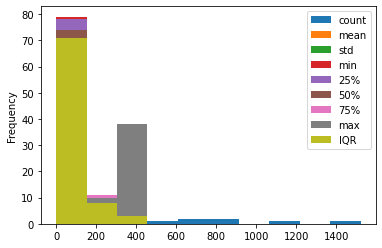

In [237]:
df_te.plot.hist()

In [238]:
# Vendo o mínimo de tempo de estadia por bairro

pd.options.display.max_rows = 82
datay.groupby('bairro', as_index=False)['tempo_estadia'].min().sort_values(by='tempo_estadia')

,bairro,tempo_estadia
0,Aclimação,1
33,Condado - Itaim Bibi,1
34,Consolação,1
35,Copacabana,1
37,Flamengo,1
38,Higienópolis,1
80,Vila Romana,1
41,Ipanema,1
43,Itaim Bibi,1
45,Jardim Canaa,1


In [239]:
# Vendo mediana de tempo de estadia por bairro

pd.options.display.max_rows = 82
datay.groupby('bairro', as_index=False)['tempo_estadia'].median().sort_values(by='tempo_estadia')

,bairro,tempo_estadia
17,Cambuci,1.0
60,Meireles,1.0
45,Jardim Canaa,1.0
80,Vila Romana,1.0
19,Campo Belo,1.0
73,Vila Congonhas,1.0
71,São Bento,1.0
5,Arouche,1.0
31,Cidade Baixa,1.0
74,Vila Homero Thon,1.5


In [250]:
# Criando um dataframe apenas com linhas booked

df_bkd = datay[datay['status'] == "BOOKED"]
df_bkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28490,BOOKED,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-01-06,2020-02-06,2020-05-28,207.50,28/05/2020,06,06,2020,2020,05,2020,31
28508,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-29,2020-12-30,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1
28509,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-14,2020-12-15,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1
28517,BOOKED,False,oi20@beto.com,NaN,NaN,NaN,NaN,2020-12-20,2020-12-21,2020-05-23,250.00,23/05/2020,12,12,2020,2020,05,2020,1


In [251]:
# Criando um dataframe apenas com linhas booked_manually

df_mbkd = datay[datay['status'] == "BOOKED_MANUALLY"]

df_mbkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
81,BOOKED_MANUALLY,True,suportelojachique@gmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-22,2022-02-22,2021-11-17,2529.10,17/11/2021,11,02,2021,2022,11,2021,92
583,BOOKED_MANUALLY,False,marinamorete@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-13,2021-11-16,2021-11-11,581.40,11/11/2021,11,11,2021,2021,11,2021,3
992,BOOKED_MANUALLY,False,stuffhype756@gmail.com,São Paulo,Santa Cecília,Rua Das Palmeiras,1226010.0,2021-09-11,2021-11-18,2021-08-11,1290.00,08/11/2021,11,11,2021,2021,11,2021,68
1111,BOOKED_MANUALLY,True,contatoluis@gmail.com,São Paulo,Centro (SP),Conselheiro Furtado,1511000.0,2021-11-23,2022-02-23,2021-05-11,3095.26,05/11/2021,11,02,2021,2022,11,2021,92
1164,BOOKED_MANUALLY,True,m.vogt@de.krannich-solar.com,São Paulo,Vila Olímpia,Rua Gomes De Carvalho,4547004.0,2021-02-12,2022-02-01,2021-05-11,5130.00,05/11/2021,12,01,2021,2022,11,2021,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [252]:
# Juntando as duas tabelas a fim de ter ambos os tipos de booked

bkd = pd.concat([df_bkd, df_mbkd], axis=0)
bkd

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [253]:
subs = bkd.groupby('isSubscription')
subs

In [254]:
# Separando os dados apenas com assinatura True

subs_true = subs.get_group(True)
subs_true

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
8,BOOKED,True,rafaelakoury@icloud.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-11-20,2022-03-20,2021-11-18,4443.65,18/11/2021,11,03,2021,2022,11,2021,120
10,BOOKED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
31,BOOKED,True,caioazeredo19@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-11-24,2021-12-24,2021-11-18,7822.23,18/11/2021,11,12,2021,2021,11,2021,30
43,BOOKED,True,hadassacampo16@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2022-11-01,2022-11-08,2021-11-18,2748.08,18/11/2021,01,08,2022,2022,11,2021,7
44,BOOKED,True,lucianaguimaf@gmail.com,São Paulo,Paraíso,Rua Apeninos,4104021.0,2021-11-22,2021-12-22,2021-11-17,3267.01,17/11/2021,11,12,2021,2021,11,2021,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,BOOKED_MANUALLY,True,anafabri07@gmail.com,São Paulo,Santa Cecília,Rua Das Palmeiras,1226010.0,2021-08-21,2021-11-21,2021-06-08,3554.78,06/08/2021,08,11,2021,2021,08,2021,92
8144,BOOKED_MANUALLY,True,nicmattar@gmail.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-07-09,2021-07-12,2021-05-08,2311.72,05/08/2021,09,12,2021,2021,08,2021,3
8231,BOOKED_MANUALLY,True,rossanacaetano@hotmail.com,São Paulo,Jardins,Rua Dr. Melo Alves,1417010.0,2021-05-08,2021-05-09,2021-04-08,4726.50,04/08/2021,08,09,2021,2021,08,2021,1
10224,BOOKED_MANUALLY,True,leandrookabe@hotmail.com,NaN,NaN,NaN,NaN,2021-07-17,2022-07-17,2021-06-28,3079.56,28/06/2021,07,07,2021,2022,06,2021,365


In [265]:
# Média de estadias para reservas bookadas por bairro com assinatura True

subs_true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
2,Barra Funda,365.000000
25,Santa Cecília,124.818182
7,Brás,114.500000
5,Bom Retiro,107.241379
27,Vila Olímpia,94.244898
6,Brooklin,89.000000
13,Condado - Itaim Bibi,87.317460
24,Pinheiros,85.160000
19,Jardim Paulista,82.000000
22,Paraíso,80.604839


NameError: name 'fig' is not defined

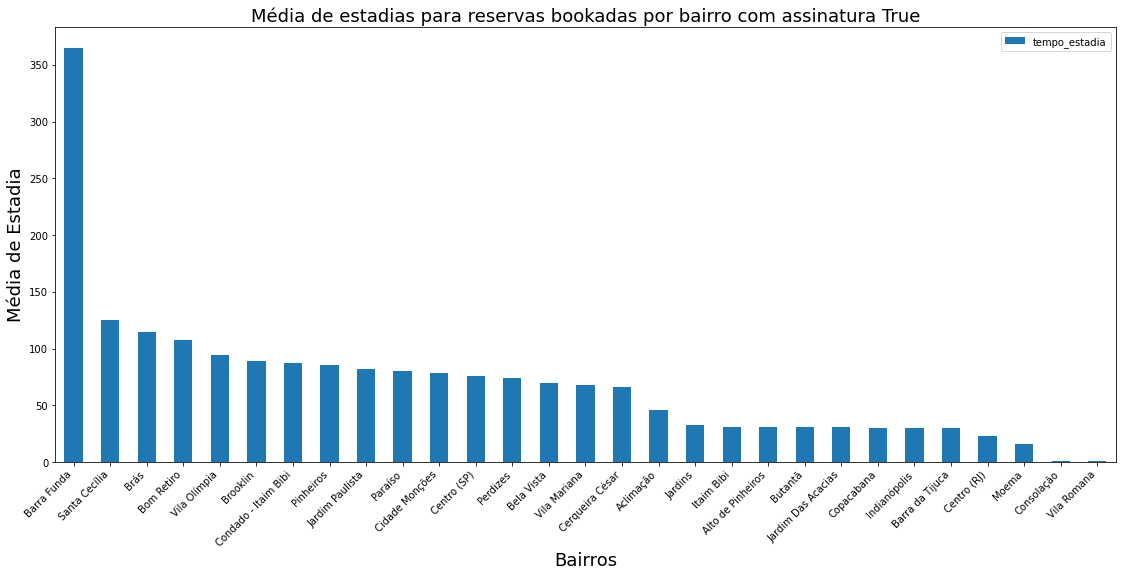

In [270]:
stb = subs_true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

ax = stb.plot.bar(x='bairro', y='tempo_estadia', figsize=(19,8), rot=45)
ax.set_xlabel('Bairros', fontdict={'fontsize':18})
ax.set_ylabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas bookadas por bairro com assinatura True', fontdict={'fontsize':18})
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()

In [256]:
# Separando os dados apenas com assinatura False

subs_false = subs.get_group(False)
subs_false

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
5,BOOKED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2819.95,18/11/2021,11,11,2021,2021,11,2021,11
7,BOOKED,False,wanderbezerra@gmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1672.00,18/11/2021,12,12,2021,2021,11,2021,276
48,BOOKED,False,netolealcontato@gmail.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-04-12,2021-06-12,2021-11-17,456.00,17/11/2021,12,12,2021,2021,11,2021,61
54,BOOKED,False,jaque_lopes@yahoo.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-12-17,2021-12-20,2021-11-17,612.00,17/11/2021,12,12,2021,2021,11,2021,3
59,BOOKED,False,paschoal_bianco@yahoo.com,São Paulo,Cerqueira César,Bela Cintra,1415002.0,2021-11-19,2021-11-21,2021-11-17,480.00,17/11/2021,11,11,2021,2021,11,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,BOOKED_MANUALLY,False,berg@slconfeccoes.com.br,NaN,NaN,NaN,NaN,2020-07-17,2020-08-31,2020-07-16,4394.27,16/07/2020,07,08,2020,2020,07,2020,45
28422,BOOKED_MANUALLY,False,tatiana.rodriguez@itixti.com.br,NaN,NaN,NaN,NaN,2020-06-28,2020-01-07,2020-06-23,720.00,23/06/2020,06,07,2020,2020,06,2020,173
28443,BOOKED_MANUALLY,False,lavinia.bertin@lock.com.br,NaN,NaN,NaN,NaN,2020-06-22,2020-06-25,2020-06-18,648.00,18/06/2020,06,06,2020,2020,06,2020,3
28453,BOOKED_MANUALLY,False,lucassantinho4@gmail.com,NaN,NaN,NaN,NaN,2020-06-15,2020-06-19,2020-06-14,495.60,14/06/2020,06,06,2020,2020,06,2020,4


In [266]:
# Média de estadias para reservas bookadas por bairro com assinatura False

subs_false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
24,Vila Madalena,229.000000
7,Chácara Santo Antônio (Zona Sul),154.000000
10,Consolação,151.333333
8,Cidade Monções,122.000000
25,Vila Mariana,102.000000
16,Jardins,94.666667
20,Perdizes,91.750000
11,Copacabana,84.750000
26,Vila Olímpia,81.962963
1,Bela Vista,80.625000


NameError: name 'fig' is not defined

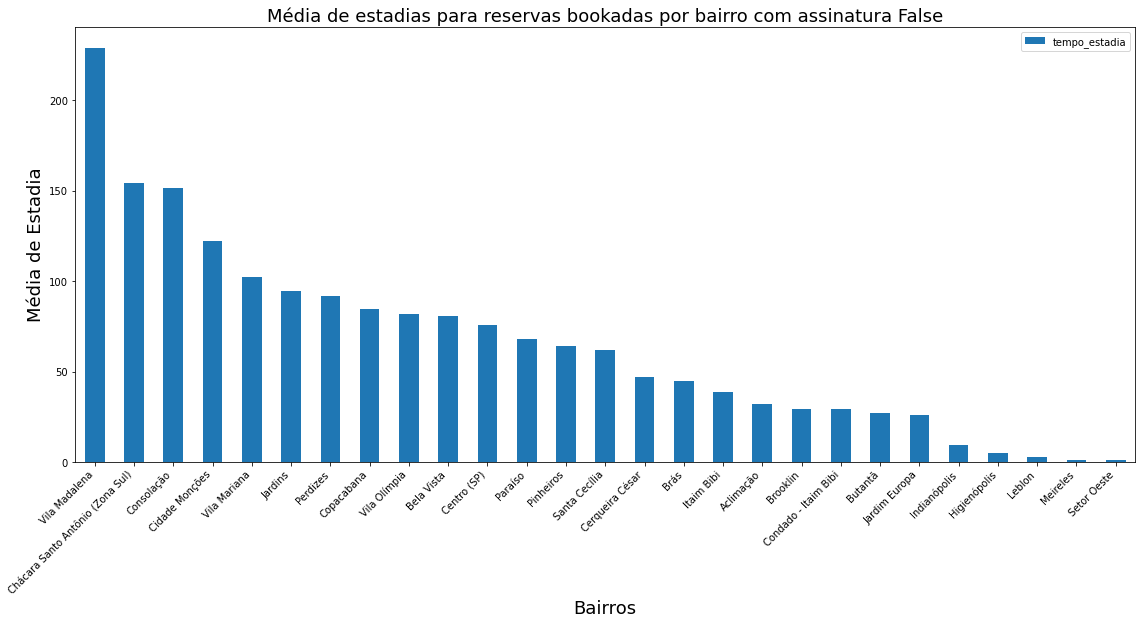

In [271]:
sfb = subs_false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

ax = sfb.plot.bar(x='bairro', y='tempo_estadia', figsize=(19,8), rot=45)
ax.set_xlabel('Bairros', fontdict={'fontsize':18})
ax.set_ylabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas bookadas por bairro com assinatura False', fontdict={'fontsize':18})
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()

In [258]:
# Criando um dataframe apenas com linhas expired

df_xpr = datay[datay['status'] == "EXPIRED"]
df_xpr

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
6,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2968.37,18/11/2021,11,11,2021,2021,11,2021,11
9,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2793.00,18/11/2021,11,11,2021,2021,11,2021,11
11,EXPIRED,False,alicecabral_@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17928,EXPIRED,False,fefanta@gmail.com,NaN,NaN,NaN,NaN,2021-01-18,2021-01-23,2020-12-17,1348.50,17/12/2020,01,01,2021,2021,12,2020,5
18024,EXPIRED,False,mtkaiesec@gmail.com,NaN,NaN,NaN,NaN,2021-03-02,2021-04-02,2020-12-15,231.38,15/12/2020,02,02,2021,2021,12,2020,31
18104,EXPIRED,False,fernandamenin093@gmail.com,NaN,NaN,NaN,NaN,2020-12-23,2021-08-01,2020-12-14,2277.15,14/12/2020,12,01,2020,2021,12,2020,221
18133,EXPIRED,False,nathaliahpff100@gmail.com,NaN,NaN,NaN,NaN,2021-01-26,2021-01-29,2020-12-14,466.14,14/12/2020,01,01,2021,2021,12,2020,3


In [259]:
# Agrupando as assinaturas para a tabela de status expired

subs_ = df_xpr.groupby('isSubscription')
subs_

In [260]:
# Separando os dados apenas com assinatura True

subs__true = subs_.get_group(True)
subs__true

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
3,EXPIRED,True,rogerioslgomes@gmail.com,São Paulo,Cerqueira César,Rua Bela Cintra,1415005.0,2021-01-12,2022-01-01,2021-11-18,9925.90,18/11/2021,12,01,2021,2022,11,2021,354
16,EXPIRED,True,lilianmonteiro007@gmail.com,São Paulo,Centro (SP),Avenida Senador Queirós,1026001.0,2021-03-12,2022-03-12,2021-11-18,2153.65,18/11/2021,12,12,2021,2022,11,2021,365
18,EXPIRED,True,lilianmonteiro007@gmail.com,São Paulo,Centro (SP),Avenida Senador Queirós,1026001.0,2021-07-12,2022-07-12,2021-11-18,2239.60,18/11/2021,12,12,2021,2022,11,2021,365
26,EXPIRED,True,edsonnascimento146@hotmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-11-19,2022-05-19,2021-11-18,3155.26,18/11/2021,11,05,2021,2022,11,2021,181
27,EXPIRED,True,saraivanatalia95@gmail.com,São Paulo,Bela Vista,Rua Francisaca Miquelina,1316000.0,2022-01-15,2022-12-15,2021-11-18,2943.33,18/11/2021,01,12,2022,2022,11,2021,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17839,EXPIRED,True,gustavomazzilli@gmail.com,NaN,NaN,NaN,NaN,2021-01-14,2021-03-14,2020-12-19,10195.97,19/12/2020,01,03,2021,2021,12,2020,59
17841,EXPIRED,True,b.henriques@outlook.com,NaN,NaN,NaN,NaN,2020-12-27,2021-03-27,2020-12-18,3331.78,18/12/2020,12,03,2020,2021,12,2020,90
17847,EXPIRED,True,rejane_23@icloud.com,NaN,NaN,NaN,NaN,2020-12-22,2021-06-22,2020-12-18,5830.69,18/12/2020,12,06,2020,2021,12,2020,182
17848,EXPIRED,True,rejane_23@icloud.com,NaN,NaN,NaN,NaN,2020-12-22,2021-06-22,2020-12-18,3645.12,18/12/2020,12,06,2020,2021,12,2020,182


In [264]:
# Média de estadias para reservas expiradas por bairro com assinatura True

subs__true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
19,Centro (GRU),365.000000
65,Água Verde,359.000000
17,Centro (CTBA),359.000000
42,Jardim dos Ipes,355.000000
5,Barra Funda,303.333333
34,Ilha do Leite,257.000000
20,Centro (POA),215.250000
41,Jardim das Acacias,201.750000
37,Itaim Bibi,162.366667
49,Mooca,161.666667


NameError: name 'fig' is not defined

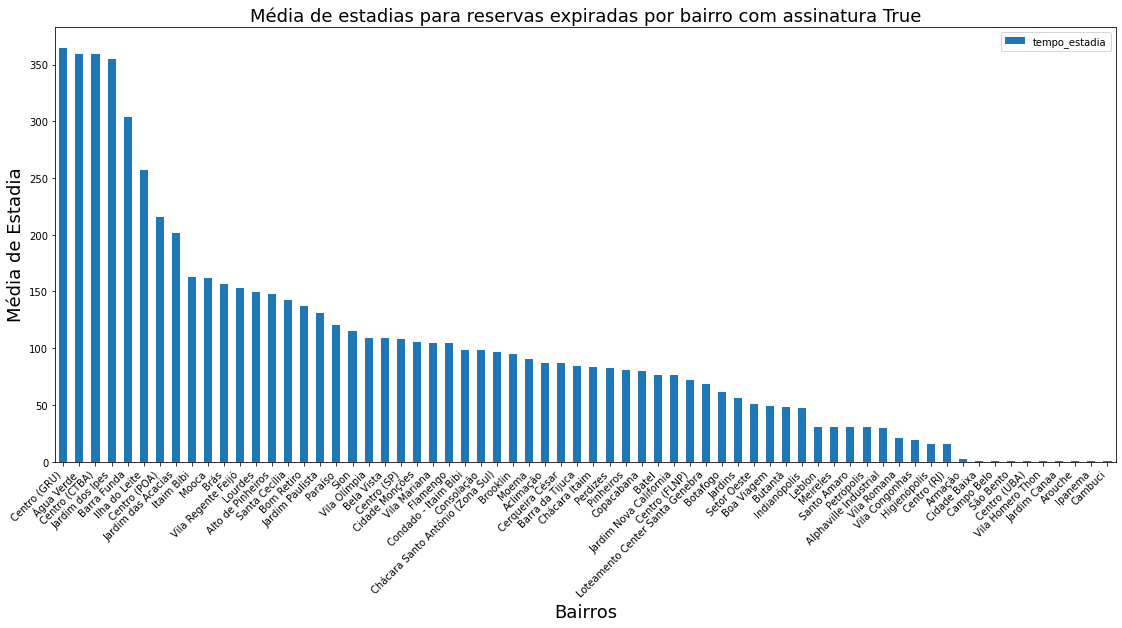

In [272]:
stx = subs__true.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

ax = stx.plot.bar(x='bairro', y='tempo_estadia', figsize=(19,8), rot=45)
ax.set_xlabel('Bairros', fontdict={'fontsize':18})
ax.set_ylabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas expiradas por bairro com assinatura True', fontdict={'fontsize':18})
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()

In [262]:
# Separando os dados apenas com assinatura False

subs__false = subs_.get_group(False)
subs__false

,status,isSubscription,guest_email,cidade,bairro,rua,CEP,entrada,saida,criacao2,cost_total,criacao,mes_entrada,mes_saida,ano_entrada,ano_saida,mes_criacao2,ano_criacao2,tempo_estadia
4,EXPIRED,False,spodlubn@hotmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-29,2021-02-12,2021-11-18,754.47,18/11/2021,11,12,2021,2021,11,2021,290
6,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2968.37,18/11/2021,11,11,2021,2021,11,2021,11
9,EXPIRED,False,gabrieloffbz@gmail.com,São Paulo,Condado - Itaim Bibi,Avenida Brigadeiro Faria Lima,4538132.0,2021-11-19,2021-11-30,2021-11-18,2793.00,18/11/2021,11,11,2021,2021,11,2021,11
11,EXPIRED,False,alicecabral_@hotmail.com,São Paulo,Vila Mariana,Rua Humberto I,4002010.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
12,EXPIRED,False,wanderbezerra@gmail.com,São Paulo,Paraíso,Vergueiro,1504001.0,2021-03-12,2021-12-13,2021-11-18,1760.00,18/11/2021,12,12,2021,2021,11,2021,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17928,EXPIRED,False,fefanta@gmail.com,NaN,NaN,NaN,NaN,2021-01-18,2021-01-23,2020-12-17,1348.50,17/12/2020,01,01,2021,2021,12,2020,5
18024,EXPIRED,False,mtkaiesec@gmail.com,NaN,NaN,NaN,NaN,2021-03-02,2021-04-02,2020-12-15,231.38,15/12/2020,02,02,2021,2021,12,2020,31
18104,EXPIRED,False,fernandamenin093@gmail.com,NaN,NaN,NaN,NaN,2020-12-23,2021-08-01,2020-12-14,2277.15,14/12/2020,12,01,2020,2021,12,2020,221
18133,EXPIRED,False,nathaliahpff100@gmail.com,NaN,NaN,NaN,NaN,2021-01-26,2021-01-29,2020-12-14,466.14,14/12/2020,01,01,2021,2021,12,2020,3


In [267]:
# Média de estadias para reservas expiradas por bairro com assinatura False

subs__false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

,bairro,tempo_estadia
58,Vila Nova Conceição,302.000000
17,Centro (UBA),171.000000
3,Auxiliadora,140.000000
30,Ipanema,115.800000
25,Copacabana,93.754717
46,Manaíra,92.000000
36,Jardim Paulista,87.500000
56,Vila Madalena,82.222222
39,Jardins,82.125000
21,Chácara Santo Antônio (Zona Sul),79.727273


NameError: name 'fig' is not defined

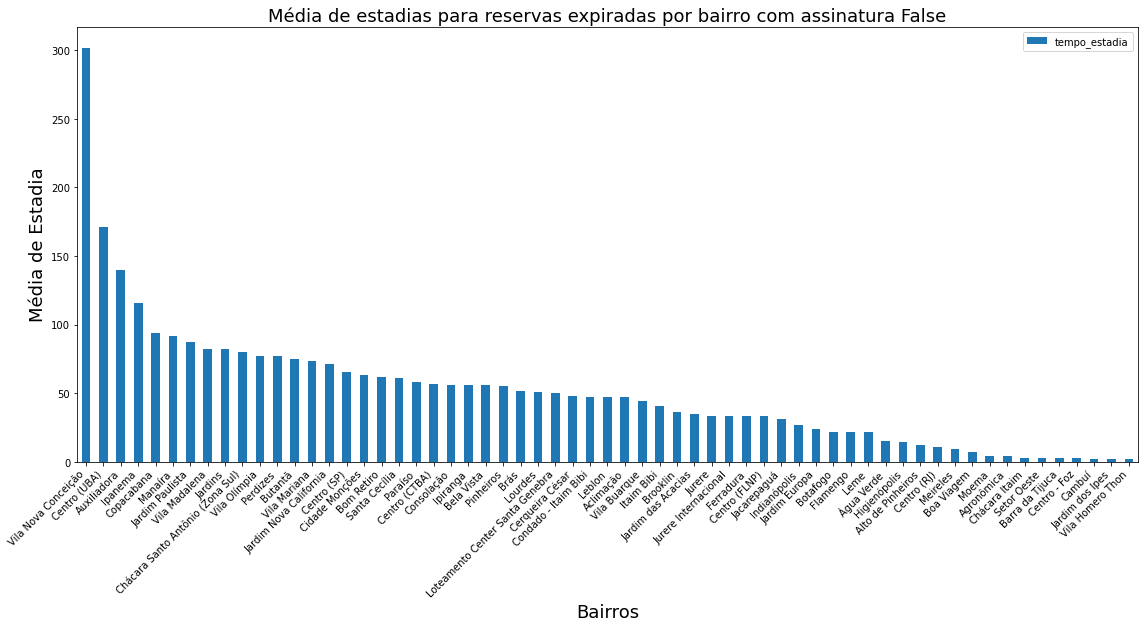

In [273]:
sfx = subs__false.groupby('bairro', as_index=False)['tempo_estadia'].mean().sort_values(by='tempo_estadia', ascending=False)

ax = sfx.plot.bar(x='bairro', y='tempo_estadia', figsize=(19,8), rot=45)
ax.set_xlabel('Bairros', fontdict={'fontsize':18})
ax.set_ylabel('Média de Estadia', fontdict={'fontsize':18})
ax.set_title('Média de estadias para reservas expiradas por bairro com assinatura False', fontdict={'fontsize':18})
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()

In [194]:
#data_subset = data.loc[:, ['email', 'status', 'status_2', 'status_1', 'mes_status_2', 'ano_status_2', 'mes_status_1', 'ano_status_1']]
#sub_status = data_subset.groupby('status')
#display(sub_status)

In [25]:
#sub_status.groups

In [26]:
#data[['status', 'email', 'status_2', 'status_1']].groupby(['status', 'email']).count()

In [27]:
#data.groupby(['mes_status_2', 'status', 'email']).mes_status_2.agg('size')

In [28]:
#data.groupby(['mes_status_1', 'status', 'email']).mes_status_1.agg('size')

In [29]:
#data1 = data.copy()

In [30]:
#data1 = pd.get_dummies(data, columns=['status', 'status_2', 'status_1'])
#data1.head()

In [31]:
#df['createdAt'] = pd.to_datetime(df['createdAt'], format= '%d/%m/%Y')

In [32]:
#df[['createdAt']].info()

In [33]:
#df['updatedAt'] = pd.to_datetime(df['updatedAt'], format= '%d/%m/%Y')
#df['data_checkin'] = pd.to_datetime(df['data_checkin'], format= '%d/%m/%Y')
#df['data_checkout'] = pd.to_datetime(df['data_checkout'], format= '%d/%m/%Y')
#df['data_status_1'] = pd.to_datetime(df['data_status_1'], format= '%d/%m/%Y')
#df['data_status_2'] = pd.to_datetime(df['data_status_2'], format= '%d/%m/%Y')

In [34]:
#df.info(verbose=True)

In [35]:
#df.groupby(['email', 'status'])['status'].count()
#df.groupby('status', as_index=False)["email"].count()

In [36]:
#status_ = df.groupby("status")

In [37]:
#pd.options.display.max_columns = 103
#status_.get_group('EXPIRED')